# TP3 : Support Vector Machine (SVM) with Sklearn

In [0]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import time 

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, LinearSVC, NuSVC

from sklearn.metrics import precision_score, classification_report, confusion_matrix

## Load MNIST dataset

In [0]:
# import data
mnist = fetch_openml('mnist_784')

In [12]:
images = mnist.data.reshape((-1,28,28))
labels = mnist.target
print("Shape of training images : ", images.shape)
print("Shape of training data : ", data.shape)
print("Shape of label : ", labels.shape)

Shape of training images :  (70000, 28, 28)
Shape of training data :  (70000, 784)
Shape of label :  (70000,)


In [13]:
target_list = np.unique(mnist.target)
print(target_list)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


## Split training & test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size=0.7)

X_train, y_train = X_train[:500], y_train[:500]
X_test, y_test = X_test[:500], y_test[:500]

print("Training data shape : ", X_train.shape)
print("Training target shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape)
print("Testing target shape : ", y_test.shape)

Training data shape :  (500, 784)
Training target shape :  (500,)
Testing data shape :  (500, 784)
Testing target shape :  (500,)


## Create a Linear SVM classifier

In [15]:
%%time 
clf = LinearSVC()
clf.fit(X_train,y_train)

CPU times: user 128 ms, sys: 947 µs, total: 129 ms
Wall time: 134 ms


## Prediction score

In [16]:
y_pred = clf.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (clf, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0):
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        46
           1       0.91      0.94      0.93        53
           2       0.88      0.80      0.84        55
           3       0.86      0.75      0.80        59
           4       0.77      0.85      0.81        47
           5       0.64      0.65      0.64        43
           6       0.93      0.87      0.90        45
           7       0.87      0.85      0.86        54
           8       0.76      0.67      0.71        42
           9       0.72      0.84      0.78        56

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82     

## **Parameter tuning for SVM**

### ***1. Kernel function***

In [0]:
train_scores = []
test_scores = []
exec_times = []

In [27]:
## linear
clf = SVC(kernel='linear')
start =  time.clock()
clf.fit(X_train,y_train)
end_train = time.clock()
print("Training execution time :", end_train - start)
y_pred = clf.predict(X_test)
end_pred = time.clock() 
print("Prediction time :", end_pred - end_train)
print("Classification report for classifier %s:\n%s\n" % (clf, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

train_scores.append(clf.score(X_train,y_train))
test_scores.append(clf.score(X_test,y_test))
exec_times.append(end_train-start)

Training execution time : 0.1640650000000079
Prediction time : 0.1650059999999911
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        46
           1       0.93      0.98      0.95        53
           2       0.91      0.89      0.90        55
           3       0.92      0.76      0.83        59
           4       0.91      0.91      0.91        47
           5       0.68      0.74      0.71        43
           6       0.87      0.87      0.87        45
           7       0.89      0.87      0.88        54
           8       0.88      0.71      0.79        42
           9       0.75      0.86      0.80        56

    accuracy                           

In [28]:
## poly
clf = SVC(kernel='poly')
start =  time.clock()
clf.fit(X_train,y_train)
end_train = time.clock()
print("Training execution time :", end_train - start)
y_pred = clf.predict(X_test)
end_pred = time.clock() 
print("Prediction time :", end_pred - end_train)
print("Classification report for classifier %s:\n%s\n" % (clf, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

train_scores.append(clf.score(X_train,y_train))
test_scores.append(clf.score(X_test,y_test))
exec_times.append(end_train-start)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training execution time : 0.41425499999999715
Prediction time : 0.22660299999999722
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        55
           3       0.00      0.00      0.00        59
           4       0.00      0.00      0.00        47
           5       0.09      1.00      0.16        43
           6       0.00      0.00      0.00        45
           7       0.00      0.00      0.00        54
           8       0.00      0.00      0.00        42
           9       0.00      0.00      0.00        56

    accuracy                           

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
## rbf
clf = SVC(kernel='rbf')
start =  time.clock()
clf.fit(X_train,y_train)
end_train = time.clock()
print("Training execution time :", end_train - start)
y_pred = clf.predict(X_test)
end_pred = time.clock() 
print("Prediction time :", end_pred - end_train)
print("Classification report for classifier %s:\n%s\n" % (clf, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

train_scores.append(clf.score(X_train,y_train))
test_scores.append(clf.score(X_test,y_test))
exec_times.append(end_train-start)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training execution time : 0.34092199999999195
Prediction time : 0.23023799999999994
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        46
           1       0.70      0.98      0.82        53
           2       0.91      0.76      0.83        55
           3       0.65      0.80      0.72        59
           4       0.70      0.81      0.75        47
           5       0.49      0.56      0.52        43
           6       0.88      0.84      0.86        45
           7       0.90      0.87      0.89        54
           8       0.95      0.43      0.59        42
           9       0.64      0.66      0.65        56

    accuracy                           0

In [30]:
## sigmoid
clf = SVC(kernel='sigmoid')
start =  time.clock()
clf.fit(X_train,y_train)
end_train = time.clock()
print("Training execution time :", end_train - start)
y_pred = clf.predict(X_test)
end_pred = time.clock() 
print("Prediction time :", end_pred - end_train)
print("Classification report for classifier %s:\n%s\n" % (clf, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

train_scores.append(clf.score(X_train,y_train))
test_scores.append(clf.score(X_test,y_test))
exec_times.append(end_train-start)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training execution time : 0.39014099999999985
Prediction time : 0.2311640000000068
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.63      0.77        46
           1       0.58      0.98      0.73        53
           2       0.97      0.55      0.70        55
           3       0.61      0.78      0.69        59
           4       0.44      0.96      0.60        47
           5       0.31      0.51      0.38        43
           6       0.89      0.76      0.82        45
           7       0.90      0.85      0.88        54
           8       0.00      0.00      0.00        42
           9       0.58      0.12      0.21        56

    accuracy                         

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
## precomputed
# clf = SVC(kernel='precomputed')
# start =  time.clock()
# clf.fit(X_train,y_train)
# end_train = time.clock()
# print("Training execution time :", end_train - start)
# y_pred = clf.predict(X_test)
# end_pred = time.clock() 
# print("Prediction time :", end_pred - end_train)
# print("Classification report for classifier %s:\n%s\n" % (clf, classification_report(y_test, y_pred)))
# print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

# scores.append(clf.score(X_test,y_test))
# exec_times.append(end_train-start)

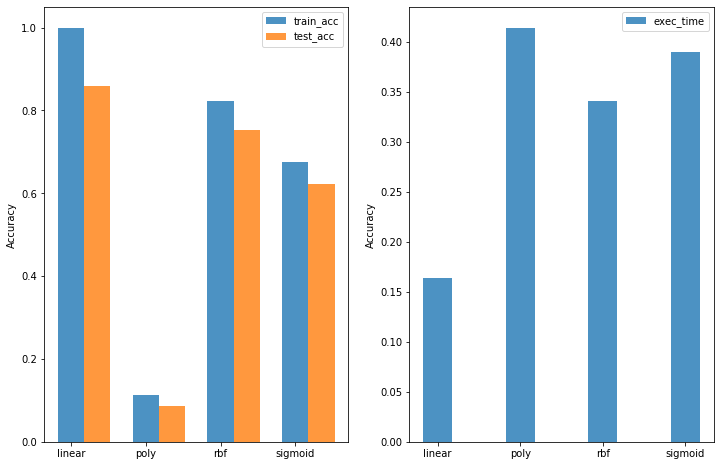

In [37]:
kernels = ('linear', 'poly', 'rbf', 'sigmoid')
y_pos = np.arange(len(kernels))
bar_width = 0.35
opacity = 0.8

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.bar(y_pos,train_scores,bar_width,align='center',alpha=opacity,label='train_acc')
plt.bar(y_pos+0.35,test_scores,bar_width,align='center',alpha=opacity,label='test_acc')
plt.xticks(y_pos,kernels)
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(122)
plt.bar(y_pos,exec_times,bar_width,align='center',alpha=opacity,label='exec_time')
plt.xticks(y_pos,kernels)
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### ***2. Penalty parameter C of the error term***

In [50]:
c_settings = np.array([0.1,1.0,10.0,100.0,1000.0])
train_scores, test_scores = [], []
for c in c_settings : 
    clf = SVC(kernel='linear', C=c)
    start =  time.clock()
    clf.fit(X_train,y_train)
    end_train = time.clock()
    print("Training execution time :", end_train - start)
    train_scores.append(clf.score(X_train,y_train))
    test_scores.append(clf.score(X_test,y_test))

Training execution time : 0.16026100000000554
Training execution time : 0.15988500000000272
Training execution time : 0.15961599999999976
Training execution time : 0.162982999999997
Training execution time : 0.16389900000000068


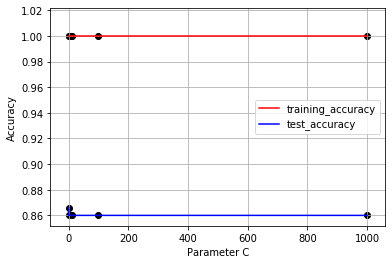

<Figure size 432x288 with 0 Axes>

In [51]:
plt.scatter(c_settings,train_scores,c="black")
plt.scatter(c_settings,test_scores,c="black")
plt.plot(c_settings, train_scores,'r', label = "training_accuracy")
plt.plot(c_settings, test_scores,'b-', label = "test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Parameter C")
plt.legend()
plt.grid()

plt.show()

plt.savefig('TP3-acc-vs-C-in-SVM.png')